In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv('Sorghum.data.csv')
print(df.shape)

(1200, 332)


In [3]:
df.describe()

,740,741,742,743,744,745,746,747,748,749,...,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,...,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.615311,1.615358,1.615364,1.615469,1.615742,1.616217,1.616822,1.617500,1.618164,1.618746,...,1.732780,1.732817,1.731917,1.730594,1.729484,1.728516,1.728721,1.729712,1.730910,1.731593
std,0.068293,0.068294,0.068297,0.068287,0.068257,0.068204,0.068142,0.068082,0.068033,0.067994,...,0.053045,0.053228,0.053172,0.052946,0.052725,0.052490,0.052609,0.053086,0.053788,0.054312
min,1.468954,1.469210,1.469254,1.469459,1.469966,1.470832,1.471834,1.472807,1.473594,1.474135,...,1.621015,1.620887,1.620136,1.619136,1.618261,1.617626,1.617336,1.616960,1.616323,1.615533
25%,1.547876,1.547897,1.547876,1.548120,1.548768,1.549292,1.549858,1.550620,1.551457,1.552251,...,1.691107,1.690379,1.689496,1.688660,1.688215,1.686961,1.687218,1.687901,1.688967,1.689142
50%,1.599222,1.598992,1.598637,1.598435,1.598456,1.598785,1.599355,1.600049,1.600716,1.601248,...,1.716882,1.717468,1.716594,1.714821,1.713058,1.711590,1.711572,1.713451,1.715692,1.717214
75%,1.672791,1.672175,1.671846,1.671473,1.671769,1.672541,1.673234,1.673853,1.674445,1.675040,...,1.780241,1.780002,1.779050,1.777880,1.776396,1.774930,1.774930,1.776141,1.779029,1.780122
max,1.731532,1.731063,1.731853,1.732675,1.733417,1.734014,1.734535,1.734994,1.735450,1.735934,...,1.836458,1.837473,1.836513,1.834345,1.832236,1.830105,1.830620,1.833313,1.836777,1.838862


In [4]:
df.head()

,Predictor,740,741,742,743,744,745,746,747,748,...,1061,1062,1063,1064,1065,1066,1067,1068,1069,1070
0,Macia,1.578888,1.578605,1.578358,1.578273,1.578407,1.578795,1.579398,1.580190,1.581060,...,1.715564,1.716572,1.715728,1.713750,1.711821,1.709867,1.710382,1.712926,1.716188,1.718157
1,Macia,1.722123,1.722023,1.721886,1.721859,1.722016,1.722412,1.723012,1.723801,1.724663,...,1.828098,1.829089,1.828116,1.825942,1.823828,1.821694,1.822196,1.824866,1.828305,1.830373
2,Macia,1.537366,1.537556,1.537712,1.537959,1.538367,1.538979,1.539764,1.540705,1.541703,...,1.701192,1.702250,1.701466,1.699550,1.697678,1.695777,1.696319,1.698871,1.702131,1.704104
3,Macia,1.670065,1.670187,1.670193,1.670233,1.670407,1.670781,1.671343,1.672091,1.672928,...,1.785619,1.786554,1.785572,1.783420,1.781330,1.779222,1.779691,1.782280,1.785622,1.787627
4,Macia,1.583988,1.583546,1.583137,1.582894,1.582882,1.583138,1.583625,1.584320,1.585113,...,1.709327,1.710335,1.709498,1.707529,1.705609,1.703663,1.704176,1.706712,1.709962,1.711924


In [5]:
df.Predictor.unique()

array(['Macia', 'Melkam', 'Meko-1', 'Teshale', 'Dekeba', 'Gambella_1107',
       'Birhan', 'Abshir', '76TI#23', 'Gubiye', nan], dtype=object)

In [6]:
df = df.iloc[0:500,:]

df1 = pd.get_dummies(df['Predictor'])
df_new = pd.concat([df, df1], axis=1)
df_new = df_new.iloc[:,:]
df_new

In [47]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df.iloc[:, 0] = labelencoder.fit_transform(df.iloc[:, 0])
df['Predictor'].unique()

array([6, 8, 7, 9, 3, 4, 2, 1, 0, 5])

In [37]:
X = df.iloc[:,-0].values
y = df.iloc[:, 0].values

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [41]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train.reshape(-1,1), y_train)


/Users/jagruti/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/jagruti/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
y_pred = classifier.predict(X_test.reshape(-1,1))

In [44]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [45]:
cm

array([[13,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 13,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 15,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 15,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 11,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 11,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 12,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 12,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 10],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 13]])

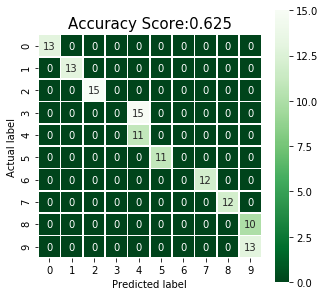

In [48]:
import seaborn as sns
cm = metrics.confusion_matrix(y_test , y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.8, square = True, cmap = 'Greens_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

all_sample_title = 'Accuracy Score:{:0.3f}'.format(ms)
plt.title(all_sample_title, size = 15);

In [49]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        15
           3       0.00      0.00      0.00        15
           4       0.42      1.00      0.59        11
           5       1.00      1.00      1.00        11
           6       0.00      0.00      0.00        12
           7       0.00      0.00      0.00        12
           8       0.00      0.00      0.00        10
           9       0.57      1.00      0.72        13

   micro avg       0.61      0.61      0.61       125
   macro avg       0.50      0.60      0.53       125
weighted avg       0.51      0.61      0.54       125



/Users/jagruti/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jagruti/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jagruti/Desktop/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
